# **Linear regression model code**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.datasets import fetch_california_housing

boston = fetch_california_housing()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
X = df.drop("PRICE", axis=1) #feature
y = df["PRICE"] #target (house price)

X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=44)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Model Performance:
Mean Squared Error: 0.5347838950335043
R² Score: 0.6084415600235559


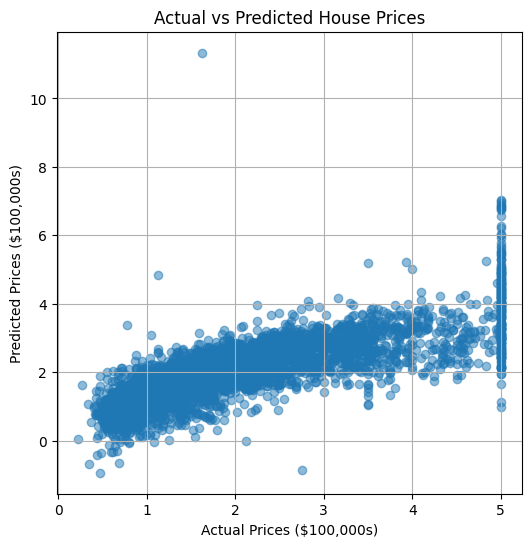

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices ($100,000s)")
plt.ylabel("Predicted Prices ($100,000s)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# **Logistic regression model code**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

df["species"] = df["species"].map({0:"setosa", 1:"versicolor", 2:"cudse"})

print("First 10 row, default is 5")
print(df.head(10))




First 10 row, default is 5
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7  seto

In [3]:
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [4]:
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print("\accuracy: ",accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



ccuracy:  0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      0.91      0.91        11
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



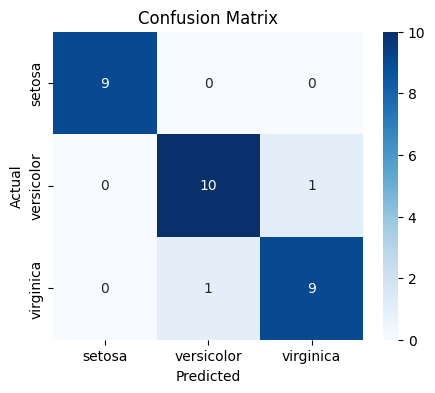

In [5]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Testing with gradiant decent

In [22]:
#### generate sample data ###
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42)
X = 2 * np.random.rand(100,1) # 100 point between 0 and 2
y = 4+3 * X + np.random.randn(100,1)

In [23]:
##### define function for prediction and loss #####
def predict(X,w,b):
    return X*w+b

def compute_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()/2

In [24]:
###### Gradient decent algorithms

def gradrient_desecent(X,y, w_init,b_init,learning_rate,n_iteration):
    w,b = w_init,b_init
    m = len(y)
    
    for i in range(n_iteration):
        y_pred = predict(X,w,b)

        #compute gradient
        dw = -(1/m) * np.sum(X * (y-y_pred))
        db = -(1/m) * np.sum(y-y_pred)

        #update parameter
        w = w - learning_rate * dw
        b = b - learning_rate * db

        #print loss in every 100 iterration
        if i%100 == 0:
            loss = compute_loss(y,y_pred)
            print(f"Iteration {i}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w,b

In [25]:
# Initialize parameters
w_init = 0.0
b_init = 0.0
learning_rate = 0.1
n_iterations = 1000

w,b = gradrient_desecent(X,y,w_init,b_init,learning_rate,n_iterations)
print(f"\n Final parameter: w = {w:.4f},b = {b:.4f}")

Iteration 0: Loss = 25.0042, w = 0.7384, b = 0.6820
Iteration 100: Loss = 0.4082, w = 2.9259, b = 4.0386
Iteration 200: Loss = 0.4035, w = 2.7982, b = 4.1832
Iteration 300: Loss = 0.4033, w = 2.7752, b = 4.2093
Iteration 400: Loss = 0.4033, w = 2.7710, b = 4.2141
Iteration 500: Loss = 0.4033, w = 2.7703, b = 4.2149
Iteration 600: Loss = 0.4033, w = 2.7701, b = 4.2151
Iteration 700: Loss = 0.4033, w = 2.7701, b = 4.2151
Iteration 800: Loss = 0.4033, w = 2.7701, b = 4.2151
Iteration 900: Loss = 0.4033, w = 2.7701, b = 4.2151

 Final parameter: w = 2.7701,b = 4.2151


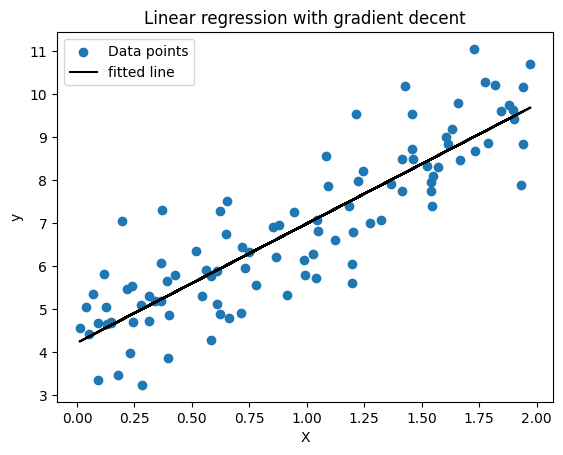

In [26]:
plt.scatter(X,y, label="Data points")
plt.plot(X,predict(X,w,b),color="black",label="fitted line")
plt.xlabel("X")
plt.ylabel('y')
plt.title("Linear regression with gradient decent")
plt.legend()
plt.show()

# **naive bayes model**